In [ ]:
#import the libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [ ]:
#read the csv file
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
#general overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
#checking for the null values
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
# filling 0 to null values of Postal code colums
df["Postal Code"].fillna(0,inplace=True)

In [ ]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [ ]:
#changing from float to integer
df["Postal Code"]=df["Postal Code"].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int64  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [ ]:
# describe the data
df.describe()


,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


**Cleaning the data**

In [ ]:
#Checking for duplicate values
# Using Conditional Statements
if df.duplicated().sum()>0:
  print("Duplicate are Present")
else:
  print("Duplicate are not Present")

Duplicate are not Present


**Exploratory Data Analysis**

**Customer Analysis**

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [ ]:
#Types Of Customers
tof=df["Segment"].unique()

In [ ]:
tof

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
# no of customers in each segment
noc=df["Segment"].value_counts().reset_index()
noc=noc.rename(columns={"index":"Customer Type","Segment":"Total Customers"})


In [ ]:
noc

,Customer Type,Total Customers
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


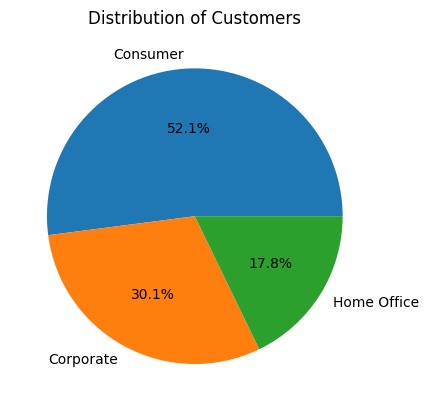

In [ ]:
# PLotting a Pie chart
plt.pie(noc["Total Customers"],labels=noc["Customer Type"],autopct="%1.1f%%")

# Set pie chart title
plt.title("Distribution of Customers")
plt.show()

**Customers and Sales**

In [ ]:
sales_per_cat=df.groupby("Segment")["Sales"].sum().reset_index()

In [ ]:
sales_per_cat

,Segment,Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


In [ ]:
sales_per_cat=sales_per_cat.rename(columns={"Segment":"Customer Type","Sales":"Total Sales"})

In [ ]:
sales_per_cat

,Customer Type,Total Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


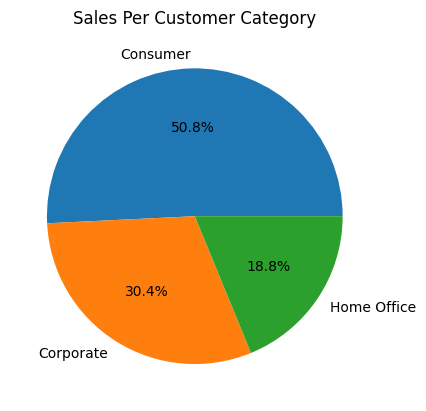

In [ ]:
# PLotting a Pie chart
plt.pie(sales_per_cat["Total Sales"],labels=sales_per_cat["Customer Type"],autopct="%1.1f%%")

# Set pie chart title
plt.title("Sales Per Customer Category")
plt.show()

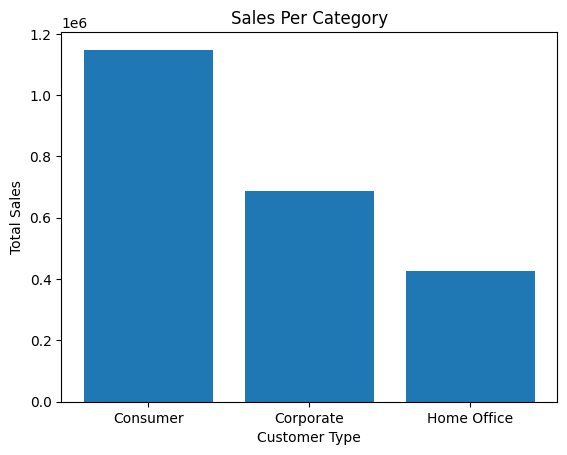

In [ ]:
# Bar Graph
plt.bar(sales_per_cat["Customer Type"],sales_per_cat["Total Sales"])

#labels
plt.title("Sales Per Category")
plt.xlabel("Customer Type")
plt.ylabel("Total Sales")
plt.show()

**Customer Loyalty**

In [ ]:
#Group data according to : Customer id,Customer Name,Segment and calculate freq of the orders
df.columns


Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [ ]:
cof=df.groupby(["Customer ID","Customer Name","Segment"])["Order ID"].count().reset_index()
cof=cof.rename(columns={"Order ID":"Total Orders"})

In [ ]:
print(cof)

    Customer ID       Customer Name    Segment  Total Orders
0      AA-10315          Alex Avila   Consumer            11
1      AA-10375        Allen Armold   Consumer            15
2      AA-10480        Andrew Allen   Consumer            12
3      AA-10645       Anna Andreadi   Consumer            18
4      AB-10015       Aaron Bergman   Consumer             6
..          ...                 ...        ...           ...
788    XP-21865        Xylona Preis   Consumer            28
789    YC-21895      Yoseph Carroll  Corporate             8
790    YS-21880       Yana Sorensen  Corporate            12
791    ZC-21910    Zuschuss Carroll   Consumer            31
792    ZD-21925  Zuschuss Donatelli   Consumer             9

[793 rows x 4 columns]


In [ ]:
# identify Repeated Customer
repated_cust=cof[cof["Total Orders"]>=1]

In [ ]:
repated_cust

,Customer ID,Customer Name,Segment,Total Orders
0,AA-10315,Alex Avila,Consumer,11
1,AA-10375,Allen Armold,Consumer,15
2,AA-10480,Andrew Allen,Consumer,12
3,AA-10645,Anna Andreadi,Consumer,18
4,AB-10015,Aaron Bergman,Consumer,6
...,...,...,...,...
788,XP-21865,Xylona Preis,Consumer,28
789,YC-21895,Yoseph Carroll,Corporate,8
790,YS-21880,Yana Sorensen,Corporate,12
791,ZC-21910,Zuschuss Carroll,Consumer,31


In [ ]:
sorted_repeat=repated_cust.sort_values(by="Total Orders",ascending=False).reset_index(drop=True).head(10)

In [ ]:
sorted_repeat

,Customer ID,Customer Name,Segment,Total Orders
0,WB-21850,William Brown,Consumer,35
1,PP-18955,Paul Prost,Home Office,34
2,MA-17560,Matt Abelman,Home Office,34
3,JL-15835,John Lee,Consumer,33
4,CK-12205,Chloris Kastensmidt,Consumer,32
5,SV-20365,Seth Vernon,Consumer,32
6,JD-15895,Jonathan Doherty,Corporate,32
7,AP-10915,Arthur Prichep,Consumer,31
8,ZC-21910,Zuschuss Carroll,Consumer,31
9,EP-13915,Emily Phan,Consumer,31


In [ ]:
#group data based on: Customer Id,Customer Names and Sales
SalesCust=df.groupby(["Customer ID","Customer Name"])["Sales"].sum().reset_index()

In [ ]:
SalesCust

,Customer ID,Customer Name,Sales
0,AA-10315,Alex Avila,5563.560
1,AA-10375,Allen Armold,1056.390
2,AA-10480,Andrew Allen,1790.512
3,AA-10645,Anna Andreadi,5086.935
4,AB-10015,Aaron Bergman,886.156
...,...,...,...
788,XP-21865,Xylona Preis,2374.658
789,YC-21895,Yoseph Carroll,5454.350
790,YS-21880,Yana Sorensen,6720.444
791,ZC-21910,Zuschuss Carroll,8025.707


In [ ]:
# sort in desc Order
top_spenders=SalesCust.sort_values(by="Sales",ascending=False)

In [ ]:
top_spenders.head(10).reset_index(drop=True)

,Customer ID,Customer Name,Sales
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
5,KL-16645,Ken Lonsdale,14175.229
6,SC-20095,Sanjit Chand,14142.334
7,HL-15040,Hunter Lopez,12873.298
8,SE-20110,Sanjit Engle,12209.438
9,CC-12370,Christopher Conant,12129.072


**Mode of Shipping**

In [ ]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [ ]:
typeofshipping=df["Ship Mode"].unique()

In [ ]:
typeofshipping

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
ship_mode=df["Ship Mode"].value_counts().reset_index()

In [ ]:
ship_mode

,index,Ship Mode
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


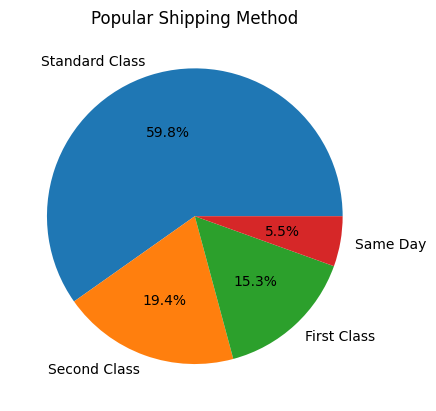

In [ ]:
# plot a pie chart
plt.pie(ship_mode["Ship Mode"],labels=ship_mode["index"],autopct="%1.1f%%")

#set labels
plt.title("Popular Shipping Method")
plt.show()

**Graphical Analysis**

In [ ]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


In [ ]:
#Customers by State
state=df["State"].value_counts().reset_index()
state=state.rename(columns={"index":"State","State":"No of Customers"})
state.head(10)

,State,No of Customers
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504
5,Illinois,483
6,Ohio,454
7,Florida,373
8,Michigan,253
9,North Carolina,247


In [ ]:
#Customer by City
City=df["City"].value_counts().reset_index()
City=City.rename(columns={"index":"City","City":"No of Customers"})
City.head(10)


,City,No of Customers
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426
5,Houston,374
6,Chicago,308
7,Columbus,221
8,San Diego,170
9,Springfield,161


In [ ]:
# Sales per State
#grouping state and analysis

sales=df.groupby(["State"])["Sales"].sum().reset_index()
top_state=sales.sort_values(by="Sales",ascending=False).reset_index(drop=True)
top_state.head(10)

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


In [ ]:
# Sales per City
#grouping City and analysis

SalesCity=df.groupby(["City"])["Sales"].sum().reset_index()
top_City=SalesCity.sort_values(by="Sales",ascending=False).reset_index()
top_City.head(10)

,index,City,Sales
0,327,New York City,252462.5470
1,265,Los Angeles,173420.1810
2,450,Seattle,116106.3220
3,436,San Francisco,109041.1200
4,372,Philadelphia,108841.7490
5,207,Houston,63956.1428
6,80,Chicago,47820.1330
7,435,San Diego,47521.0290
8,216,Jacksonville,44713.1830
9,123,Detroit,42446.9440


**Product Analysis**

In [ ]:
#Types of Products Category
product_category=df["Category"].unique()
product_category


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
#group data by product category
subcategory=df.groupby("Category")["Sub-Category"].nunique().reset_index()
# sort by ascending order
subcategory=subcategory.sort_values(by="Sub-Category",ascending=False).reset_index(drop=True)
subcategory

,Category,Sub-Category
0,Office Supplies,9
1,Furniture,4
2,Technology,4


In [ ]:
# Sales per each category
sales_cat=df.groupby("Category")["Sales"].sum().reset_index()

In [ ]:
sales_cat=sales_cat.sort_values(by="Sales",ascending=False).reset_index(drop=True)

In [ ]:
sales_cat

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


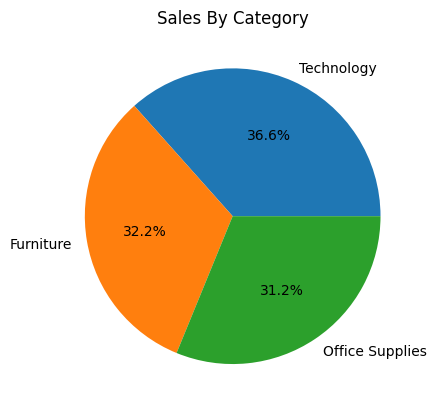

In [ ]:
#plotting a pie chart
plt.pie(sales_cat["Sales"],labels=sales_cat["Category"],autopct="%1.1f%%")

#set labels
plt.title("Sales By Category")
plt.show()

In [ ]:
#group data by product sub-category
pdt_subcategory=df.groupby("Sub-Category")["Sales"].sum().reset_index()
#sorting in ascending orders
pdt_subcategory=pdt_subcategory.sort_values(by="Sales",ascending=False).reset_index(drop=True)

In [ ]:
pdt_subcategory

,Sub-Category,Sales
0,Phones,327782.4480
1,Chairs,322822.7310
2,Storage,219343.3920
3,Tables,202810.6280
4,Binders,200028.7850
5,Machines,189238.6310
6,Accessories,164186.7000
7,Copiers,146248.0940
8,Bookcases,113813.1987
9,Appliances,104618.4030


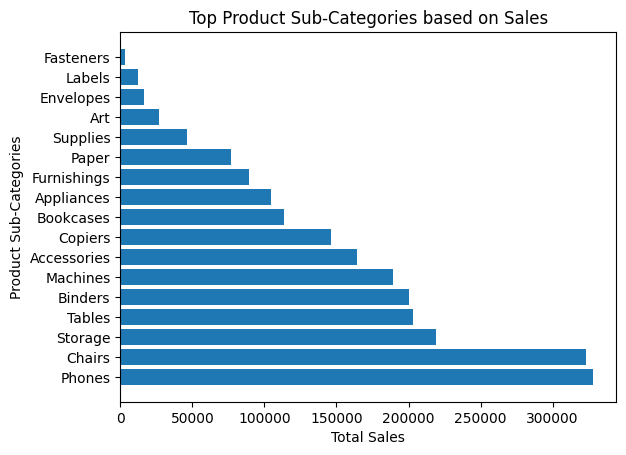

In [ ]:
#Plotting the  bar graph
plt.barh(pdt_subcategory["Sub-Category"],pdt_subcategory["Sales"])
#label
plt.title("Top Product Sub-Categories based on Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Sub-Categories")
plt.show()

In [ ]:
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96


**Sales**

In [ ]:
#Convert order date to  datetime format
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)
yearly_sales=df.groupby(df["Order Date"].dt.year)["Sales"].sum().reset_index()
#Renaming the columns
yearly_sales=yearly_sales.rename(columns={"Order Date":"Year","Sales":"Total Sales"})

In [ ]:
yearly_sales

,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


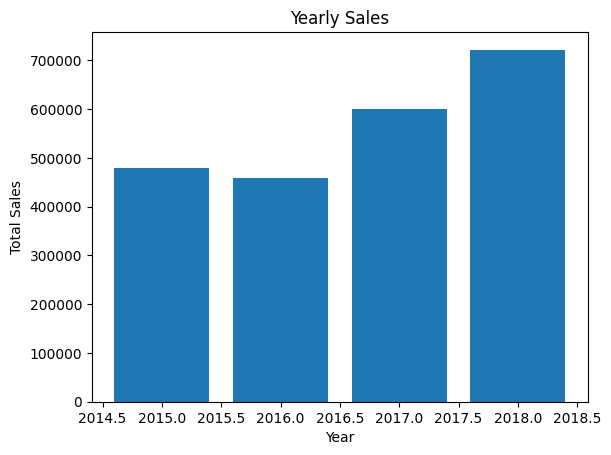

In [ ]:
#plotting bar graph
# Bar Graph
plt.bar(yearly_sales["Year"],yearly_sales["Total Sales"])

#labels
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.show()

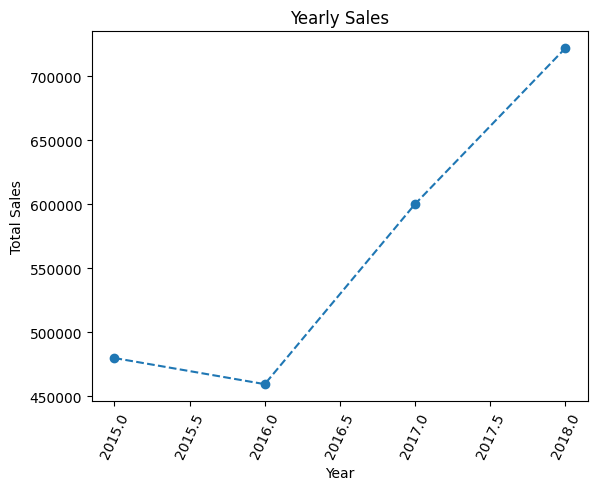

In [ ]:
#plotting the line graph
plt.plot(yearly_sales["Year"],yearly_sales["Total Sales"],marker="o",linestyle="--")
#label
plt.title("Yearly Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks(rotation=65)
plt.show()